# ==================================================
#
#       Map the California and PNW Reservoirs
#
# ===================================================

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import cartopy.io.shapereader as shpreader
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import calendar
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

In [9]:
# ------------------------------------------------------------
#    Function to plot a color bar 
# ------------------------------------------------------------

# NOTE - the line doesn't s how up with a layer has a zorder > 1

def scale_bar(ax, length, utm_zone, adjx, adjy, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    """
    #Projection in metres, need to change this to suit your own figure
    utm = ccrs.UTM(utm_zone)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    #Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    sbcx = sbcx + adjx  #I added adjx to adjust left or right
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * 500, sbcx + length * 500 ] 
    #Plot the scalebar
    ax.plot(bar_xs, [sbcy, sbcy+adjy], transform=utm, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbcx, sbcy+(adjy/2), str(length) + ' km', transform=utm,
            horizontalalignment='center', verticalalignment='bottom')

In [10]:
# ------------------------------------------------------------
#           Upload California Reservoir Information
# ------------------------------------------------------------

# ---------- stations - all of them ---------------------
file_temp = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/CA_reservoir_stations_initial.csv'
station_i = pd.read_csv(file_temp)

# -------- stations with reservoir elevation ----------
res_stations = pd.read_csv('/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/CA_reservoir_stations.csv')
res_stations.columns = ['site_no']

In [11]:
# ------------------------------------------------------------
#           Upload PNW Reservoir Information
# ------------------------------------------------------------

lat_lon_pnw = pd.read_csv('/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/latlon_reservoirs.csv')
lat_lon_pnw.columns = (['site_id','lat','lon'])

# --------------------------------------------------
#   Process California Reservoir data (get only reservoir sites)
# --------------------------------------------------

In [12]:
# -------------------------
#   Loop to extract station ID from URL
# -----------------------

ID_url_list = pd.DataFrame()
for urlx in station_i.meta_url[:]:
    myString = str(urlx)
    pos1 = myString.index('station_id=')
    idx = myString[pos1+11:]
    idx = pd.DataFrame([idx])
    idx = idx.transpose()
    ID_url_list = ID_url_list.append(idx)
indexx = list(range(1,len(ID_url_list)+1,1))
ID_url_list = ID_url_list.set_index([indexx])
ID_url_list.columns = ['station_id']

In [1]:
# -------------------------
#   Loop to match reservoir IDs with URL IDs
# -----------------------

ID_list = pd.DataFrame()
id_list = list(ID_url_list.station_id)
for idxi in res_stations['site_no']:
    #i = i + 1
    indexi = id_list.index(idxi)
    #indexi = which(idxi == ID_url_list.station_id[:])
    indexi = pd.DataFrame([indexi])
    indexi = indexi.transpose()
    ID_list = ID_list.append(indexi)
indexx = list(range(1,len(ID_list)+1,1))
ID_list = ID_list.set_index([indexx])
ID_list.columns = ['index_val']

NameError: name 'pd' is not defined

In [14]:
# -------------------------
#  Get lat/lon of sites, and make lon negative
# -----------------------
latx = np.array(station_i.lat)
lonx = np.array(station_i.lon)

latx = latx[ID_list.index_val[:]]
latx = latx.astype(float)
lonx = lonx[ID_list.index_val[:]]
lonx = lonx.astype(float)
lonx = lonx*(-1)

AttributeError: 'DataFrame' object has no attribute 'index_val'

# =============================================================
#
#            Map
#
# =============================================================

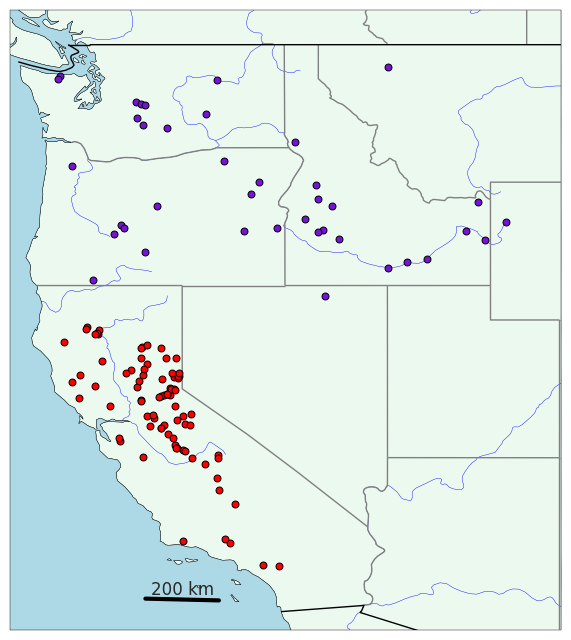

In [249]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    ax.set_extent([-125, -109, 32, 50])  # California

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    plt.plot(lonx, latx,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='red')
    plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='#7514D5')

    scale_bar(ax, 200, 10, 0)
    
    plt.show()


if __name__ == '__main__':
    main()



In [ ]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    ax.set_extent([-125, -109, 32, 50])  # California

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    plt.plot(lonx, latx,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='red')
    plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='#7514D5')

    scale_bar(ax, 200, 10, 0, 50) # adjx adjy
    #scale_bar(ax, 200, 10, 100000, 10000)
    
    plt.show()


if __name__ == '__main__':
    main()



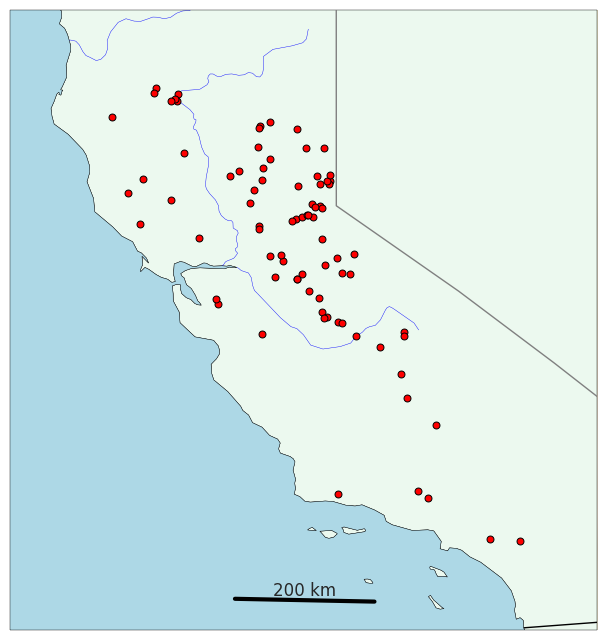

In [239]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-125, -116, 32.5, 42])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')


plt.plot(lonx, latx,'s',zorder=4, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='red')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='#7514D5')

scale_bar(ax, 200, 10, 0)

    
plt.show()

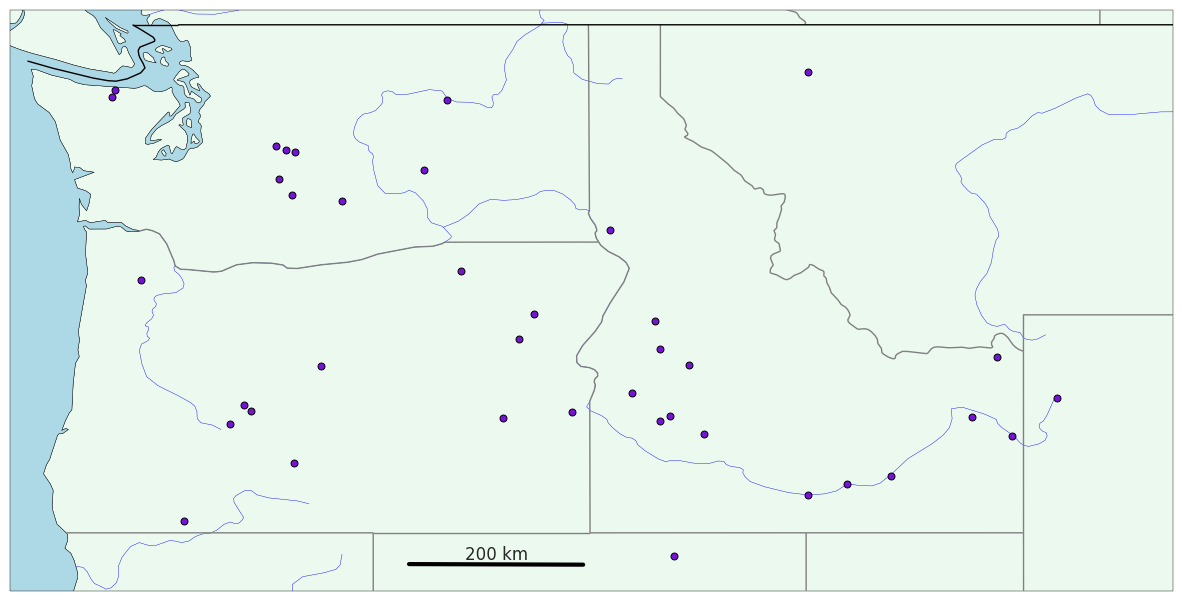

In [253]:
fig = plt.figure(figsize=(15,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
ax.set_extent([-125, -116, 32.5, 42])  # California
ax.set_extent([-125, -109, 41.2, 49.2])  # California

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(rivers_lakes, edgecolor='blue')


plt.plot(lonx, latx,'s',zorder=4, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='red')
plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='#7514D5')

scale_bar(ax, 200, 10, 100000, 10000)

    
plt.show()

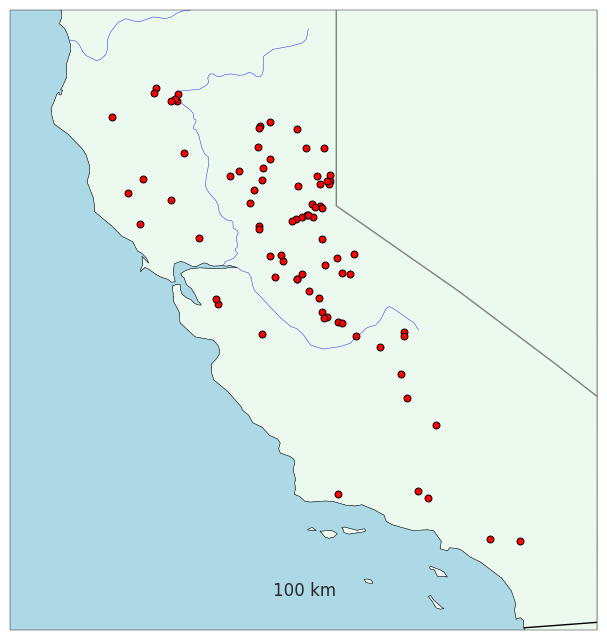

In [215]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-125, -109, 32, 50])  # Western US (all sites)
    ax.set_extent([-125, -116, 32.5, 42])  # California

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 2)
    ax.add_feature(rivers_lakes, edgecolor='blue')

    
    plt.plot(lonx, latx,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='red')
    plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='#7514D5')

    scale_bar(ax, 100, 10)
    plt.show()


if __name__ == '__main__':
    main()



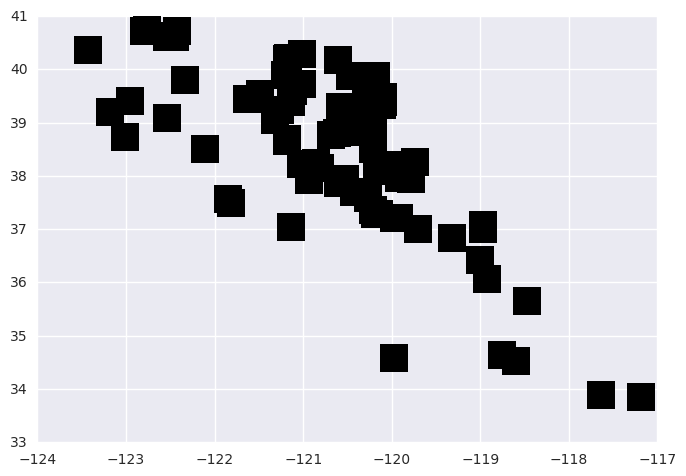

(0.0, 1.0)

In [126]:
plt.plot(lonx, latx,'s',zorder=4, markersize=20, color='black')
plt.show()
plt.xlim()

# -------------------------------------------------------
#   Extra Code
# -------------------------------------------------------


In [ ]:
# -------------------------------------------------------
#  loop to get lat/lon of reservoir sites
# -------------------------------------------------------

latx2 = []
lonx2 = []
sitesx = pd.DataFrame()

lonx = lonx[ID_list.index_val[:]]
latx = latx[ID_list.index_val[:]]

for i in range(0,len(lonx)):
        if latx[i][1].isdigit() and lonx[i][1].isdigit():
            if float(latx[i]) < 52 and float(lonx[i]) > (80):
                x = pd.DataFrame([i, float(latx[i]),float(lonx[i])])
                x = x.transpose()
                x.reset_index = int(i)
                sitesx = sitesx.append(x)


                latx2 = np.append(latx2,latx[i])
                lonxi = float(lonx[i]) * (-1)
                lonx2 = np.append(lonx2,lonxi)
                #latx2 = latx2.append(pd.DataFrame([latx[i]]))
                #lonx2 = lonx2.append(pd.DataFrame([lonx[i]]))

#sitesx.columns = ['indexi','lat','lon']
#sitesx.set_index = sitesx.indexi